In [2]:
pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.5 MB 5.8 MB/s 
     |████████████████████████████████| 18.0 MB 390 kB/s 
     |████████████████████████████████| 240 kB 34.3 MB/s 
     |████████████████████████████████| 198 kB 36.3 MB/s 
     |████████████████████████████████| 54 kB 2.0 MB/s 
     |████████████████████████████████| 112 kB 59.8 MB/s 
     |████████████████████████████████| 1.6 MB 46.1 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
     |████████████████████████████████| 943 kB 43.6 MB/s 
     |████████████████████████████████| 49 kB 6.3 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 37.5 MB 47 kB/s 
     |████████████████████████████████| 4.0 MB 48.6 MB/s 
     |████████████████████████████████| 112 kB 61.1 MB/s 
  Created wheel for qiskit: filename=qiskit-0.36.2-py3-none-any.whl size=11933 sha256=d784a5e504a

In [3]:
# Qiskit Circuit
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
qc.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

In [4]:
from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer

# 1) Lets create a simple quantum circuit.
qc = QuantumCircuit(5)
qc.h(0)
qc.cx(0,range(1,5))
qc.measure_all()
qc.draw()

┌───┐                     ░ ┌─┐            
   q_0: ┤ H ├──■────■────■────■───░─┤M├────────────
        └───┘┌─┴─┐  │    │    │   ░ └╥┘┌─┐         
   q_1: ─────┤ X ├──┼────┼────┼───░──╫─┤M├─────────
             └───┘┌─┴─┐  │    │   ░  ║ └╥┘┌─┐      
   q_2: ──────────┤ X ├──┼────┼───░──╫──╫─┤M├──────
                  └───┘┌─┴─┐  │   ░  ║  ║ └╥┘┌─┐   
   q_3: ───────────────┤ X ├──┼───░──╫──╫──╫─┤M├───
                       └───┘┌─┴─┐ ░  ║  ║  ║ └╥┘┌─┐
   q_4: ────────────────────┤ X ├─░──╫──╫──╫──╫─┤M├
                            └───┘ ░  ║  ║  ║  ║ └╥┘
meas: 5/═════════════════════════════╩══╩══╩══╩══╩═
                                     0  1  2  3  4

In [6]:
from qiskit.test.mock import FakeBoeblingen
from qiskit.compiler import transpile

# 2) Lets transpile the circuit on a simulated noisy quantum hardware backend (More on this later).
simulated_backend = FakeBoeblingen()
transpiled_qc = transpile(qc, simulated_backend)

In [8]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

In [9]:
simulator = Aer.get_backend('aer_simulator')

In [10]:
# 3) Lets execute the transpiled circuit on the simulated noisy backend
results = simulator.run(transpiled_qc).result()

# Note: For more information about simulated noiseless backend please visit:
# https://qiskit.org/documentation/tutorials/simulators/2_device_noise_simulation.html

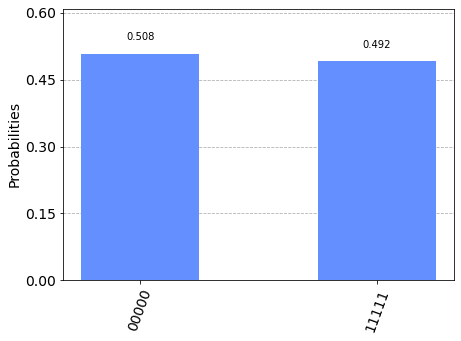

In [11]:
# 4) Lets get the results of the executed circuit
counts = results.get_counts()
plot_histogram(counts)

In [23]:
### Lets defined a new circuit of your choice with no measurements

n = 3 # number of qubits used to represent s
s = '011'   # the hidden binary string


# We need a circuit with n qubits, plus one auxiliary qubit
# Also need n classical bits to write the output to
qc = QuantumCircuit(n+1, n)

# put auxiliary in state |->
qc.h(n)
qc.z(n)

# Apply Hadamard gates before querying the oracle
for i in range(n):
    qc.h(i)
    
# Apply barrier 
qc.barrier()

# Apply the inner-product oracle
s = s[::-1] # reverse s to fit qiskit's qubit ordering
for q in range(n):
    if s[q] == '0':
        qc.i(q)
    else:
        qc.cx(q, n)
        
# Apply barrier 
qc.barrier()

#Apply Hadamard gates after querying the oracle
for i in range(n):
    qc.h(i)

'''    
# Measurement
for i in range(n):
    qc.measure(i, i)
'''
qc.draw()

┌───┐      ░                 ░ ┌───┐
q_0: ┤ H ├──────░───■─────────────░─┤ H ├
     ├───┤      ░   │             ░ ├───┤
q_1: ┤ H ├──────░───┼─────────■───░─┤ H ├
     ├───┤      ░   │  ┌───┐  │   ░ ├───┤
q_2: ┤ H ├──────░───┼──┤ I ├──┼───░─┤ H ├
     ├───┤┌───┐ ░ ┌─┴─┐└───┘┌─┴─┐ ░ └───┘
q_3: ┤ H ├┤ Z ├─░─┤ X ├─────┤ X ├─░──────
     └───┘└───┘ ░ └───┘     └───┘ ░      
c: 3/════════════════════════════════════

In [24]:
# Define a simulated noisy backend
simulated_backend = FakeBoeblingen()

transpiled_qc0 = transpile(qc, simulated_backend, optimization_level=0)  # No Optimization
print('Optimization Level 0')
print('Depth:', transpiled_qc0.depth())
print('Gate counts:', transpiled_qc0.count_ops())
transpiled_qc0.draw()

Optimization Level 0
Depth: 11
Gate counts: OrderedDict([('cx', 11), ('u2', 7), ('barrier', 2), ('u1', 1), ('id', 1)])


┌─────────┐          ░      ┌───┐               ┌───┐     »
        q_0 -> 0 ┤ U2(0,π) ├──────────░───■──┤ X ├──■─────────■──┤ X ├──■──»
                 ├─────────┤          ░ ┌─┴─┐└─┬─┘┌─┴─┐     ┌─┴─┐└─┬─┘┌─┴─┐»
        q_1 -> 1 ┤ U2(0,π) ├──────────░─┤ X ├──■──┤ X ├──■──┤ X ├──■──┤ X ├»
                 ├─────────┤          ░ └───┘┌───┐└───┘┌─┴─┐└───┘     └───┘»
        q_2 -> 2 ┤ U2(0,π) ├──────────░───■──┤ X ├──■──┤ X ├───────────────»
                 ├─────────┤┌───────┐ ░ ┌─┴─┐└─┬─┘┌─┴─┐├───┤               »
        q_3 -> 3 ┤ U2(0,π) ├┤ U1(π) ├─░─┤ X ├──■──┤ X ├┤ I ├───────────────»
                 └─────────┘└───────┘ ░ └───┘     └───┘└───┘               »
  ancilla_0 -> 4 ──────────────────────────────────────────────────────────»
                                                                           »
  ancilla_1 -> 5 ──────────────────────────────────────────────────────────»
                                                                           »
  ancilla_2 -> 6 ──────────────────────────────────────────────────────────»
                                                                           »
  ancilla_3 -> 7 ──────────────────────────────────────────────────────────»
                                                                           »
  ancilla_4 -> 8 ──────────────────────────────────────────────────────────»
                                                                           »
  ancilla_5 -> 9 ──────────────────────────────────────────────────────────»
                                                                           »
 ancilla_6 -> 10 ──────────────────────────────────────────────────────────»
                                                                           »
 ancilla_7 -> 11 ──────────────────────────────────────────────────────────»
                                                                           »
 ancilla_8 -> 12 ──────────────────────────────────────────────────────────»
                                                                           »
 ancilla_9 -> 13 ──────────────────────────────────────────────────────────»
                                                                           »
ancilla_10 -> 14 ──────────────────────────────────────────────────────────»
                                                                           »
ancilla_11 -> 15 ──────────────────────────────────────────────────────────»
                                                                           »
ancilla_12 -> 16 ──────────────────────────────────────────────────────────»
                                                                           »
ancilla_13 -> 17 ──────────────────────────────────────────────────────────»
                                                                           »
ancilla_14 -> 18 ──────────────────────────────────────────────────────────»
                                                                           »
ancilla_15 -> 19 ──────────────────────────────────────────────────────────»
                                                                           »
            c: 3/══════════════════════════════════════════════════════════»
                                                                           »
«                       ░ ┌─────────┐
«        q_0 -> 0 ──────░─┤ U2(0,π) ├
«                       ░ ├─────────┤
«        q_1 -> 1 ──■───░─┤ U2(0,π) ├
«                 ┌─┴─┐ ░ └─────────┘
«        q_2 -> 2 ┤ X ├─░────────────
«                 └───┘ ░ ┌─────────┐
«        q_3 -> 3 ──────░─┤ U2(0,π) ├
«                       ░ └─────────┘
«  ancilla_0 -> 4 ───────────────────
«                                    
«  ancilla_1 -> 5 ───────────────────
«                                    
«  ancilla_2 -> 6 ───────────────────
«                                    
«  ancilla_3 -> 7 ───────────────────
«                                    
«  ancilla_4 -> 8 ───────────────────
«                     

In [14]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.dagcircuit import DAGCircuit
from qiskit.converters import circuit_to_dag
from qiskit.tools.visualization import dag_drawer

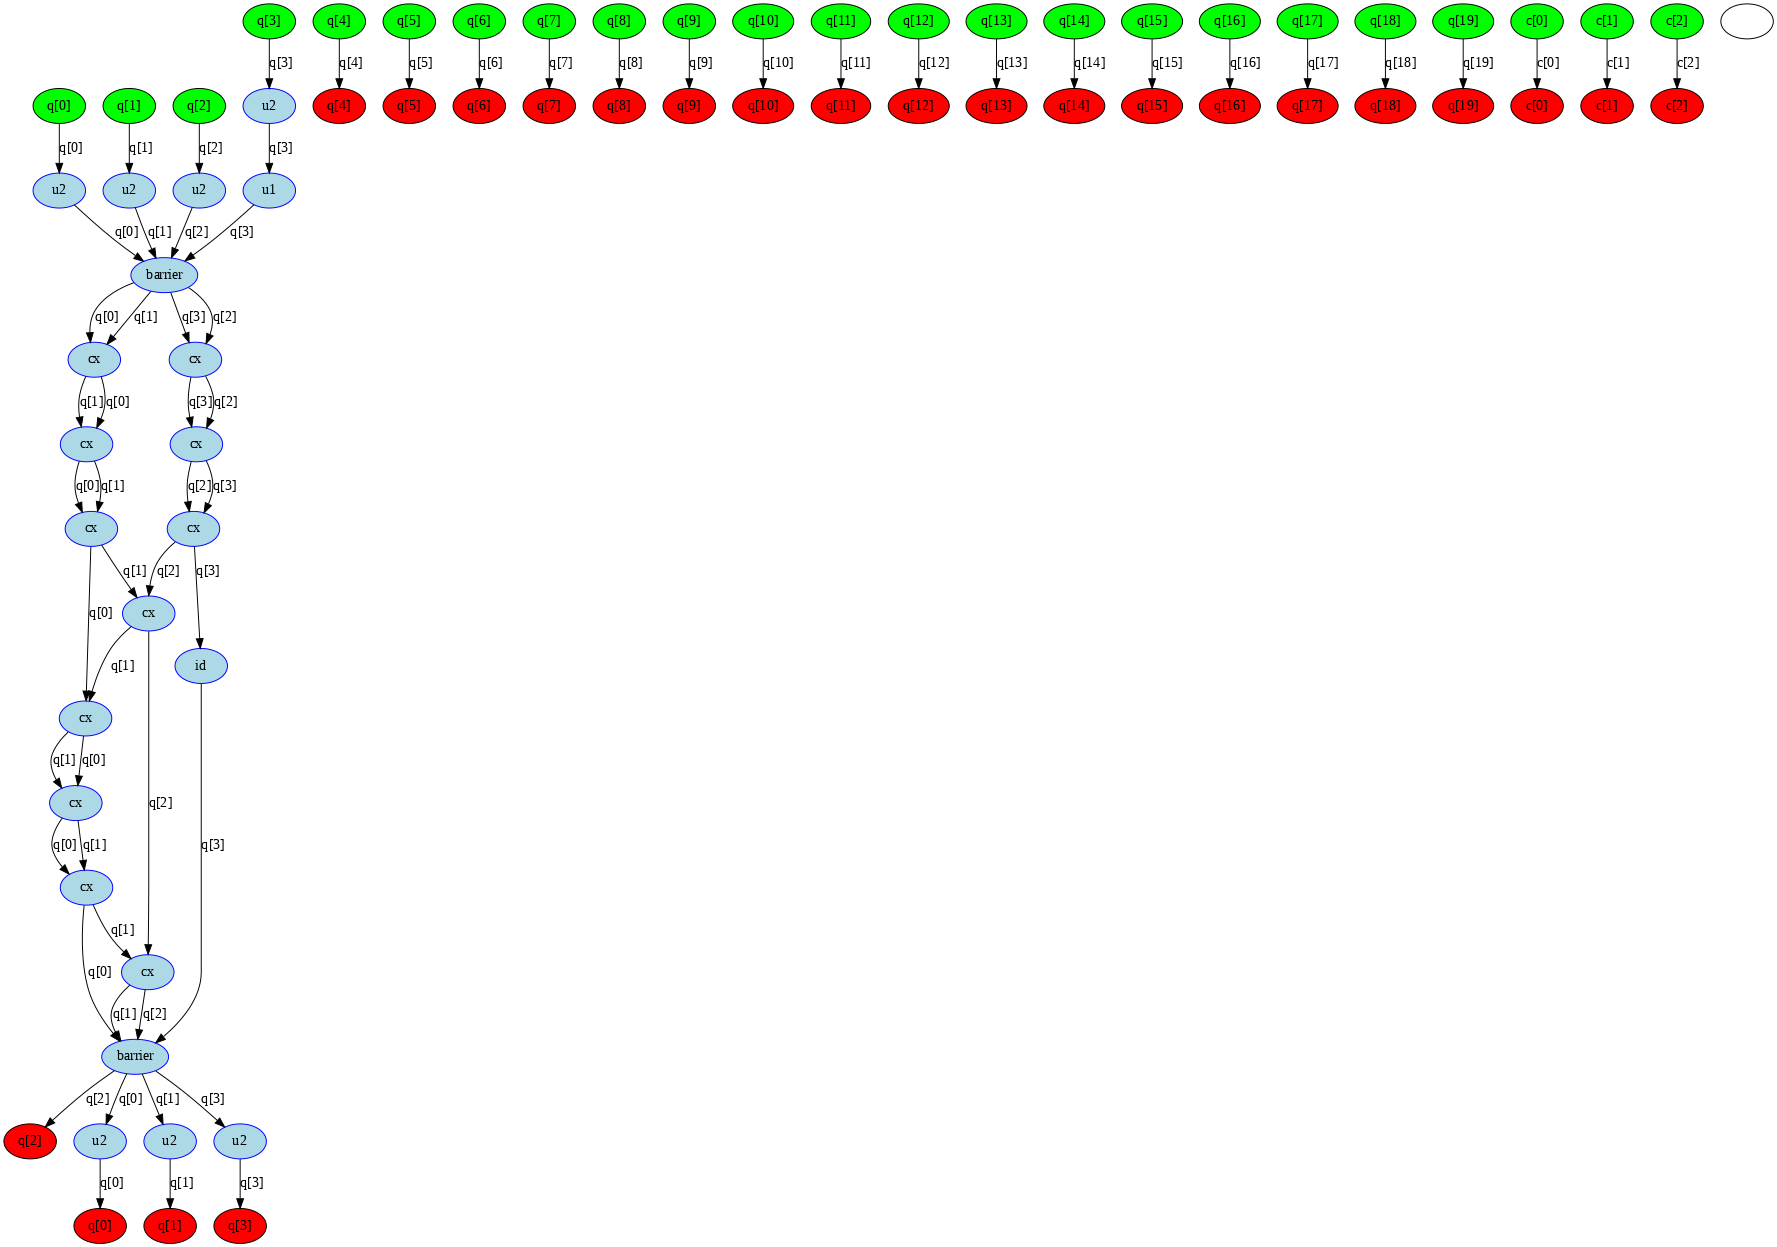

In [25]:
dag = circuit_to_dag(transpiled_qc0)
dag_drawer(dag)

In [16]:
# Define a simulated noisy backend
simulated_backend = FakeBoeblingen()

transpiled_qc1 = transpile(qc, simulated_backend, optimization_level=1)  # No Optimization
print('Optimization Level 1')
print('Depth:', transpiled_qc1.depth())
print('Gate counts:', transpiled_qc1.count_ops())
transpiled_qc1.draw()

Optimization Level 1
Depth: 4
Gate counts: OrderedDict([('u2', 7), ('barrier', 2), ('cx', 2)])


ancilla_0 -> 0 ────────────────────────────────────────
                                                         
  ancilla_1 -> 1 ────────────────────────────────────────
                                                         
  ancilla_2 -> 2 ────────────────────────────────────────
                  ┌─────────┐  ░            ░ ┌─────────┐
        q_0 -> 3 ─┤ U2(0,π) ├──░───■────────░─┤ U2(0,π) ├
                  └─────────┘  ░   │        ░ └─────────┘
  ancilla_3 -> 4 ──────────────────┼─────────────────────
                                   │                     
  ancilla_4 -> 5 ──────────────────┼─────────────────────
                                   │                     
  ancilla_5 -> 6 ──────────────────┼─────────────────────
                                   │                     
  ancilla_6 -> 7 ──────────────────┼─────────────────────
                 ┌───────────┐ ░ ┌─┴─┐┌───┐ ░            
        q_3 -> 8 ┤ U2(-π,-π) ├─░─┤ X ├┤ X ├─░────────────
                 └┬─────────┬┘ ░ └───┘└─┬─┘ ░ ┌─────────┐
        q_1 -> 9 ─┤ U2(0,π) ├──░────────■───░─┤ U2(0,π) ├
                  └─────────┘  ░            ░ └─────────┘
 ancilla_7 -> 10 ────────────────────────────────────────
                                                         
 ancilla_8 -> 11 ────────────────────────────────────────
                                                         
 ancilla_9 -> 12 ────────────────────────────────────────
                                                         
ancilla_10 -> 13 ────────────────────────────────────────
                                                         
ancilla_11 -> 14 ────────────────────────────────────────
                  ┌─────────┐  ░            ░ ┌─────────┐
       q_2 -> 15 ─┤ U2(0,π) ├──░────────────░─┤ U2(0,π) ├
                  └─────────┘  ░            ░ └─────────┘
ancilla_12 -> 16 ────────────────────────────────────────
                                                         
ancilla_13 -> 17 ────────────────────────────────────────
                                                         
ancilla_14 -> 18 ────────────────────────────────────────
                                                         
ancilla_15 -> 19 ────────────────────────────────────────
                                                         
            c: 3/════════════════════════════════════════

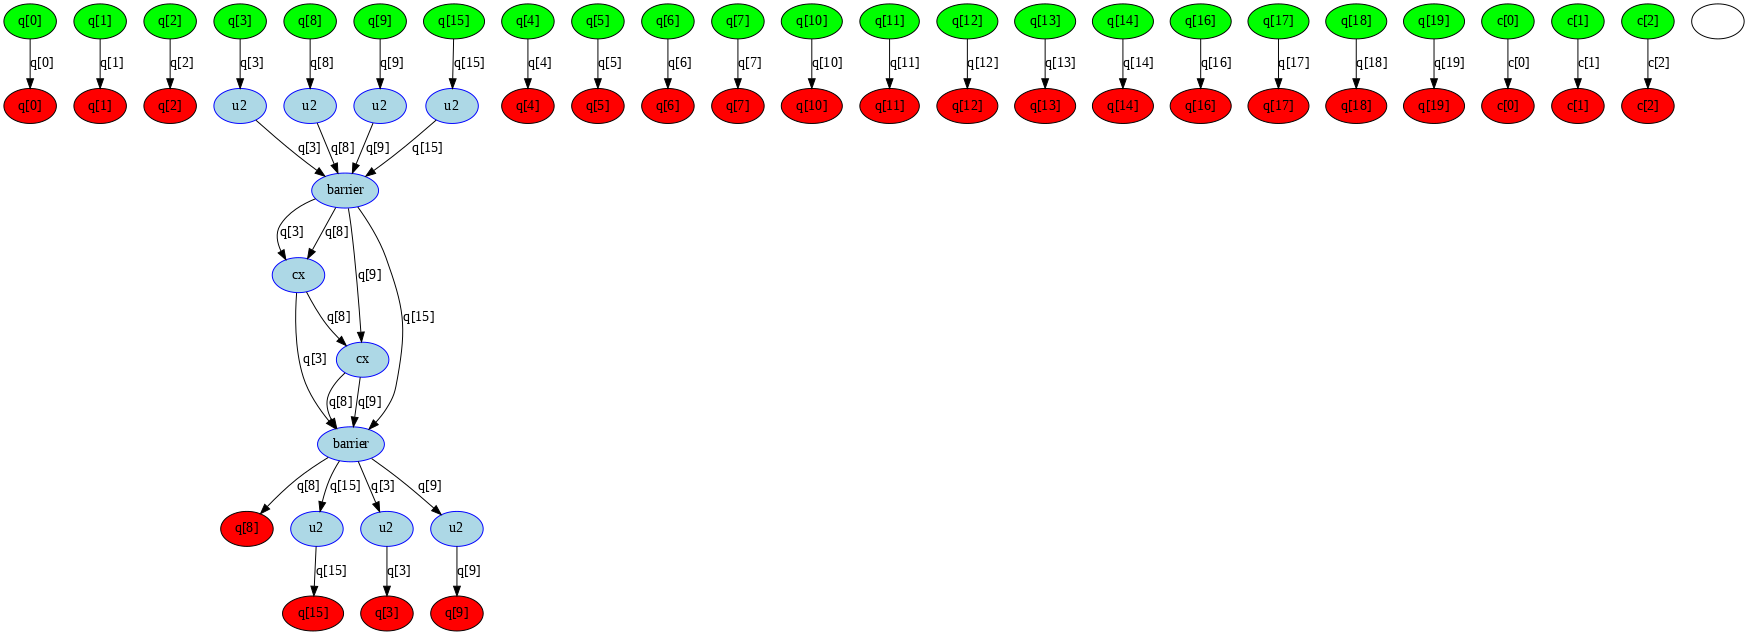

In [17]:
dag = circuit_to_dag(transpiled_qc1)
dag_drawer(dag)

In [18]:
# Define a simulated noisy backend
simulated_backend = FakeBoeblingen()

transpiled_qc2 = transpile(qc, simulated_backend, optimization_level=2)  # No Optimization
print('Optimization Level 2')
print('Depth:', transpiled_qc2.depth())
print('Gate counts:', transpiled_qc2.count_ops())
transpiled_qc2.draw()

Optimization Level 2
Depth: 4
Gate counts: OrderedDict([('u2', 7), ('barrier', 2), ('cx', 2)])


ancilla_0 -> 0 ────────────────────────────────────────
                                                         
  ancilla_1 -> 1 ────────────────────────────────────────
                                                         
  ancilla_2 -> 2 ────────────────────────────────────────
                                                         
  ancilla_3 -> 3 ────────────────────────────────────────
                                                         
  ancilla_4 -> 4 ────────────────────────────────────────
                                                         
  ancilla_5 -> 5 ────────────────────────────────────────
                                                         
  ancilla_6 -> 6 ────────────────────────────────────────
                                                         
  ancilla_7 -> 7 ────────────────────────────────────────
                                                         
  ancilla_8 -> 8 ────────────────────────────────────────
                                                         
  ancilla_9 -> 9 ────────────────────────────────────────
                                                         
ancilla_10 -> 10 ────────────────────────────────────────
                                                         
ancilla_11 -> 11 ────────────────────────────────────────
                  ┌─────────┐  ░            ░ ┌─────────┐
       q_0 -> 12 ─┤ U2(0,π) ├──░───■────────░─┤ U2(0,π) ├
                 ┌┴─────────┴┐ ░ ┌─┴─┐┌───┐ ░ └─────────┘
       q_3 -> 13 ┤ U2(-π,-π) ├─░─┤ X ├┤ X ├─░────────────
                 └┬─────────┬┘ ░ └───┘└─┬─┘ ░ ┌─────────┐
       q_1 -> 14 ─┤ U2(0,π) ├──░────────■───░─┤ U2(0,π) ├
                  ├─────────┤  ░            ░ ├─────────┤
       q_2 -> 15 ─┤ U2(0,π) ├──░────────────░─┤ U2(0,π) ├
                  └─────────┘  ░            ░ └─────────┘
ancilla_12 -> 16 ────────────────────────────────────────
                                                         
ancilla_13 -> 17 ────────────────────────────────────────
                                                         
ancilla_14 -> 18 ────────────────────────────────────────
                                                         
ancilla_15 -> 19 ────────────────────────────────────────
                                                         
            c: 3/════════════════════════════════════════

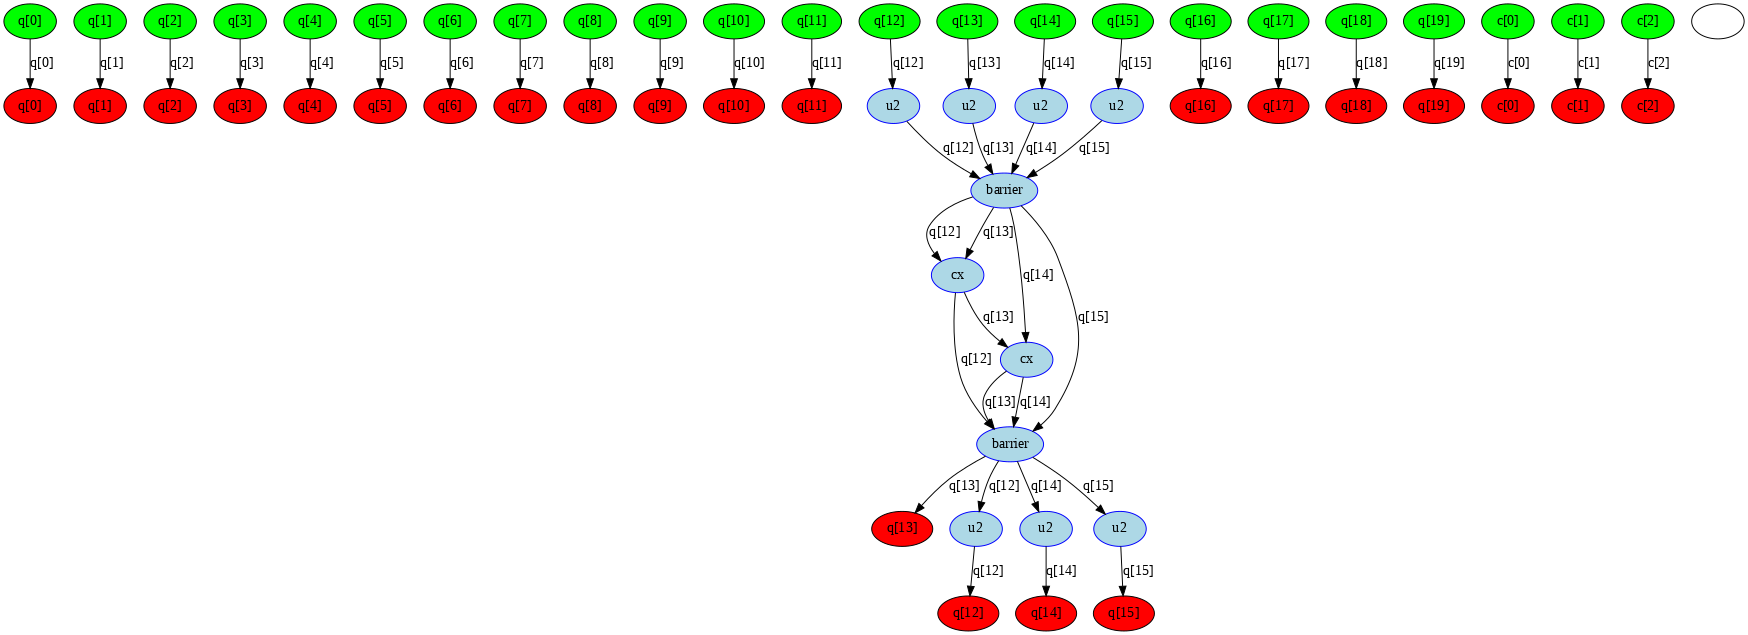

In [20]:
dag = circuit_to_dag(transpiled_qc2)
dag_drawer(dag)

In [21]:
# Define a simulated noisy backend
simulated_backend = FakeBoeblingen()

transpiled_qc3 = transpile(qc, simulated_backend, optimization_level=3)  # No Optimization
print('Optimization Level 3')
print('Depth:', transpiled_qc3.depth())
print('Gate counts:', transpiled_qc3.count_ops())
transpiled_qc3.draw()

Optimization Level 3
Depth: 4
Gate counts: OrderedDict([('u2', 7), ('barrier', 2), ('cx', 2)])


ancilla_0 -> 0 ────────────────────────────────────────
                  ┌─────────┐  ░            ░ ┌─────────┐
        q_0 -> 1 ─┤ U2(0,π) ├──░───■────────░─┤ U2(0,π) ├
                  └─────────┘  ░   │        ░ └─────────┘
  ancilla_1 -> 2 ──────────────────┼─────────────────────
                                   │                     
  ancilla_2 -> 3 ──────────────────┼─────────────────────
                                   │                     
  ancilla_3 -> 4 ──────────────────┼─────────────────────
                  ┌─────────┐  ░   │        ░ ┌─────────┐
        q_1 -> 5 ─┤ U2(0,π) ├──░───┼────■───░─┤ U2(0,π) ├
                 ┌┴─────────┴┐ ░ ┌─┴─┐┌─┴─┐ ░ └─────────┘
        q_3 -> 6 ┤ U2(-π,-π) ├─░─┤ X ├┤ X ├─░────────────
                 └───────────┘ ░ └───┘└───┘ ░            
  ancilla_4 -> 7 ────────────────────────────────────────
                                                         
  ancilla_5 -> 8 ────────────────────────────────────────
                                                         
  ancilla_6 -> 9 ────────────────────────────────────────
                                                         
 ancilla_7 -> 10 ────────────────────────────────────────
                                                         
 ancilla_8 -> 11 ────────────────────────────────────────
                                                         
 ancilla_9 -> 12 ────────────────────────────────────────
                                                         
ancilla_10 -> 13 ────────────────────────────────────────
                                                         
ancilla_11 -> 14 ────────────────────────────────────────
                  ┌─────────┐  ░            ░ ┌─────────┐
       q_2 -> 15 ─┤ U2(0,π) ├──░────────────░─┤ U2(0,π) ├
                  └─────────┘  ░            ░ └─────────┘
ancilla_12 -> 16 ────────────────────────────────────────
                                                         
ancilla_13 -> 17 ────────────────────────────────────────
                                                         
ancilla_14 -> 18 ────────────────────────────────────────
                                                         
ancilla_15 -> 19 ────────────────────────────────────────
                                                         
            c: 3/════════════════════════════════════════

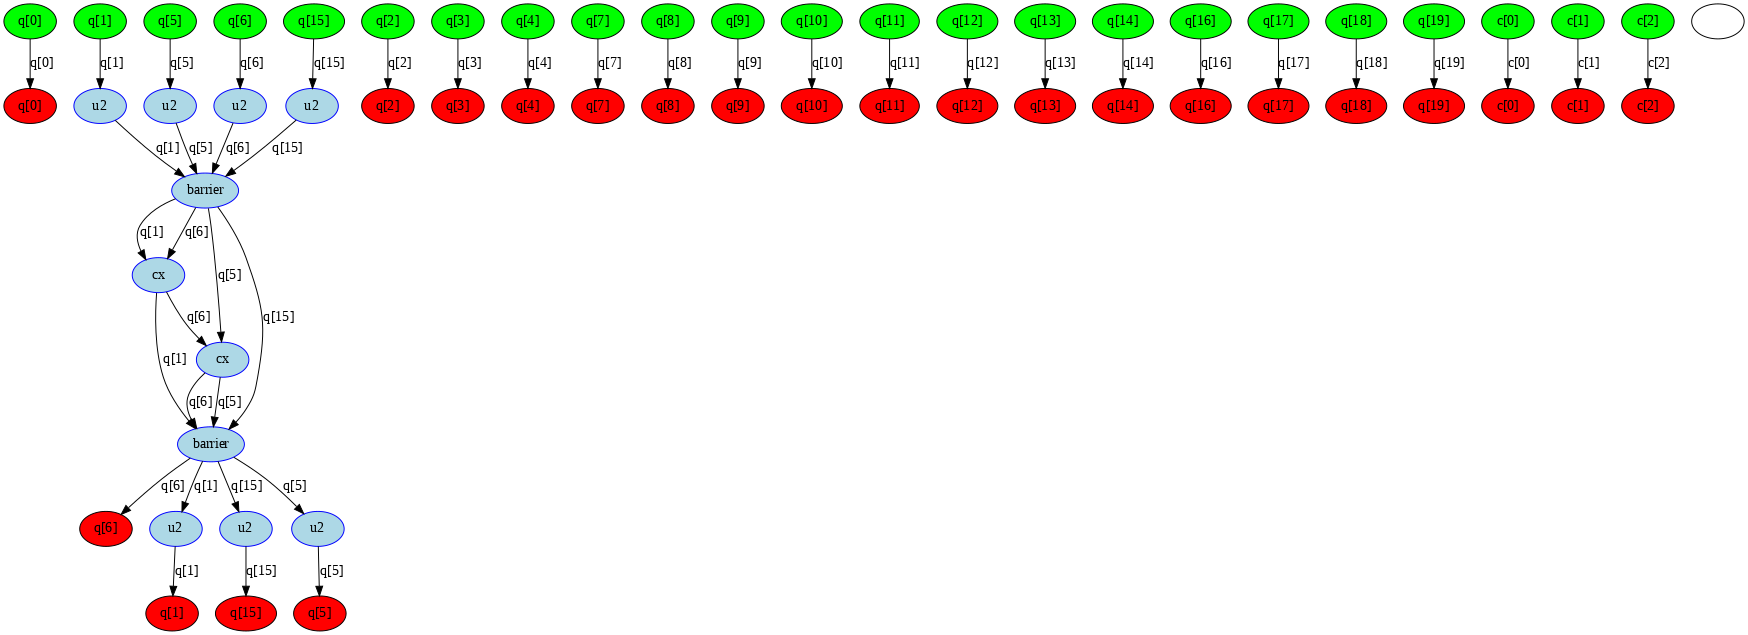

In [22]:
dag = circuit_to_dag(transpiled_qc3)
dag_drawer(dag)

In [26]:
sub_circuit = QuantumCircuit(3, name='toggle_cx')
sub_circuit.cx(0,1)
sub_circuit.cx(1,2)
sub_circuit.cx(0,1)
sub_circuit.cx(1,2)

sub_circuit.draw()

q_0: ──■─────────■───────
     ┌─┴─┐     ┌─┴─┐     
q_1: ┤ X ├──■──┤ X ├──■──
     └───┘┌─┴─┐└───┘┌─┴─┐
q_2: ─────┤ X ├─────┤ X ├
          └───┘     └───┘

In [30]:
# Define a simulated noisy backend
simulated_backend = FakeBoeblingen()

transpiled_toggle_cx = transpile(sub_circuit, simulated_backend, optimization_level=3)
print('Optimization Level 0 Toggle Cx')
print('Depth:', transpiled_toggle_cx.depth())
print('Gate counts:', transpiled_toggle_cx.count_ops())
transpiled_toggle_cx.draw()

Optimization Level 0 Toggle Cx
Depth: 4
Gate counts: OrderedDict([('cx', 4)])


ancilla_0 -> 0 ────────────────────
                                     
  ancilla_1 -> 1 ────────────────────
                                     
  ancilla_2 -> 2 ────────────────────
                                     
  ancilla_3 -> 3 ────────────────────
                                     
  ancilla_4 -> 4 ────────────────────
                                     
  ancilla_5 -> 5 ────────────────────
                                     
  ancilla_6 -> 6 ────────────────────
                                     
  ancilla_7 -> 7 ────────────────────
                                     
  ancilla_8 -> 8 ────────────────────
                                     
  ancilla_9 -> 9 ────────────────────
                                     
ancilla_10 -> 10 ────────────────────
                                     
       q_0 -> 11 ──■─────────■───────
                   │         │       
ancilla_11 -> 12 ──┼─────────┼───────
                   │         │       
ancilla_12 -> 13 ──┼─────────┼───────
                   │         │       
ancilla_13 -> 14 ──┼─────────┼───────
                   │  ┌───┐  │  ┌───┐
       q_2 -> 15 ──┼──┤ X ├──┼──┤ X ├
                 ┌─┴─┐└─┬─┘┌─┴─┐└─┬─┘
       q_1 -> 16 ┤ X ├──■──┤ X ├──■──
                 └───┘     └───┘     
ancilla_14 -> 17 ────────────────────
                                     
ancilla_15 -> 18 ────────────────────
                                     
ancilla_16 -> 19 ────────────────────

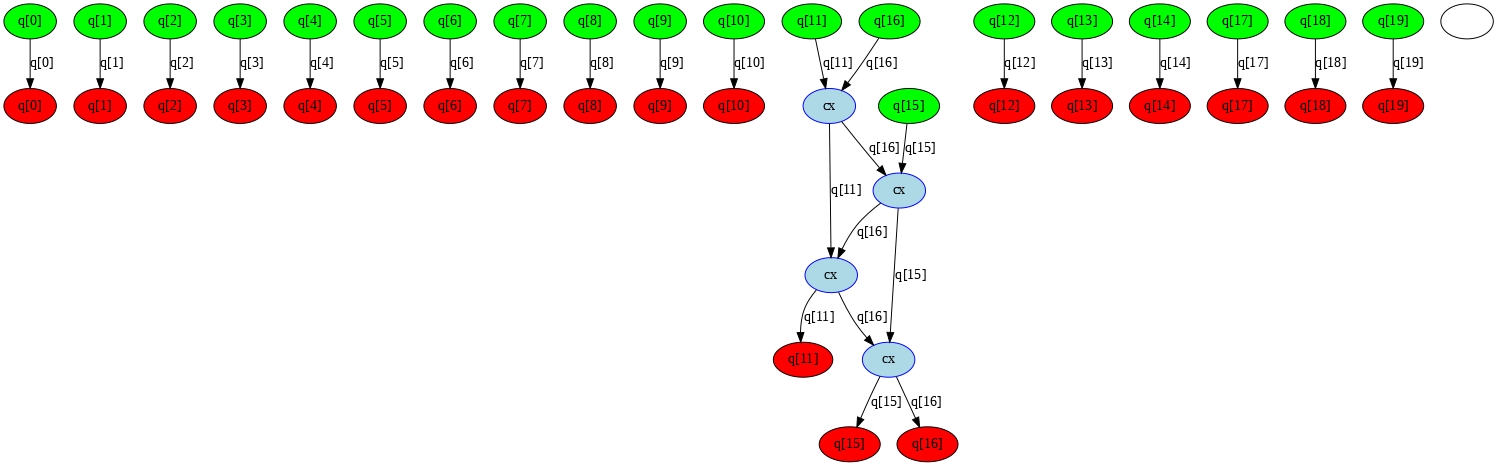

In [31]:
dag = circuit_to_dag(transpiled_toggle_cx)
dag_drawer(dag)